# Malignant vs All

## Importing libraries

In [ ]:
# Importing required libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import (
    train_test_split,
    TimeSeriesSplit,
    KFold,
    StratifiedKFold,
    GroupKFold,
    StratifiedGroupKFold,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean

from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

## Uploading file

In [ ]:
# Read in data and display first 5 rows
df = pd.read_csv (r'/content/clinical_data.csv')
df.head()

,Patient ID,Socio_Economic Status,Education Status,Age,Sex,Weight_kg,Height_metre,BMI_kg/metre2,Observable_symptom,Burning_sensation,Dental_pain,Medical_history,Oral_Habits,Exposure_in_yr,Frequency_day,Dietary_Habits,Spicy/Non_Spicy,Subject_Tag,binary_case1,binary_case2
0,P0215,L,NE,30.0,F,35.0,1.42,17.357667,Yes,No,No,No,Yes,2,2,NV,S,Malignant,M,M
1,P0216,L,NE,55.0,M,49.0,1.57,19.879103,Yes,No,No,No,Yes,2,2,NV,S,Malignant,M,M
2,P0218,L,BE,51.0,F,45.0,1.53,19.223376,Yes,No,No,No,No,0,0,NV,S,Malignant,M,M
3,P0221,L,E,32.0,F,47.0,1.52,20.342798,Yes,No,No,No,No,1,1,NV,S,Malignant,M,M
4,P0222,M,E,46.0,M,59.0,1.68,20.904195,Yes,No,No,No,Yes,2,2,NV,S,Malignant,M,M


## Label Encoding

In [ ]:
from sklearn import preprocessing
# Creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['Socio_Economic Status']=le.fit_transform(df['Socio_Economic Status'])
df['Education Status']=le.fit_transform(df['Education Status'])
df['Sex']=le.fit_transform(df['Sex'])
df['Education Status']=le.fit_transform(df['Education Status'])
df['Observable_symptom']=le.fit_transform(df['Observable_symptom'])
df['Burning_sensation']=le.fit_transform(df['Burning_sensation'])
df['Observable_symptom']=le.fit_transform(df['Observable_symptom'])
df['Dental_pain']=le.fit_transform(df['Dental_pain'])
df['Medical_history']=le.fit_transform(df['Medical_history'])
df['Oral_Habits']=le.fit_transform(df['Oral_Habits'])
df['Dietary_Habits']=le.fit_transform(df['Dietary_Habits'])
df['Spicy/Non_Spicy']=le.fit_transform(df['Spicy/Non_Spicy'])
df['Subject_Tag']=le.fit_transform(df['Subject_Tag'])
df['binary_case1']=le.fit_transform(df['binary_case1'])
df['binary_case2']=le.fit_transform(df['binary_case2'])

## Data Preprocessing

### Filling NaN values

In [ ]:
# DATA PREPROCESSING
# filling the unavailable categorical data with mode
col = df.columns.values.tolist()
#df_y.fillna(value=df_y.median(), inplace = True)
categorical = ["Socio_Economic Status","Education Status","Sex", "Observable_symptom","Burning_sensation","Dental_pain","Medical_history","Oral_Habits","Dietary_Habits","Spicy/Non_Spicy"]
#for c in col:
 # if c not in categorical:
  #  datainput[c].fillna(value=datainput[c].median(), inplace=True)
for c in categorical:
  df[c] = df[c].fillna(value=df[c].mode()[0])

In [ ]:
numerical =["Age","Weight_kg","Height_metre","BMI_kg/metre2"]
for c in numerical:
 df[c].fillna(value=df[c].median(), inplace=True)

### Dropping non-useful x labels

In [ ]:
df=df.drop(['Subject_Tag'],axis=1)
df=df.drop(['binary_case2'],axis=1)
df=df.drop(['Patient ID'],axis=1)

In [ ]:
df

,Socio_Economic Status,Education Status,Age,Sex,Weight_kg,Height_metre,BMI_kg/metre2,Observable_symptom,Burning_sensation,Dental_pain,Medical_history,Oral_Habits,Exposure_in_yr,Frequency_day,Dietary_Habits,Spicy/Non_Spicy,binary_case1
0,1,2,30.0,0,35.0,1.42,17.357667,1,0,0,0,1,2,2,0,1,0
1,1,2,55.0,1,49.0,1.57,19.879103,1,0,0,0,1,2,2,0,1,0
2,1,0,51.0,0,45.0,1.53,19.223376,1,0,0,0,0,0,0,0,1,0
3,1,1,32.0,0,47.0,1.52,20.342798,1,0,0,0,0,1,1,0,1,0
4,2,1,46.0,1,59.0,1.68,20.904195,1,0,0,0,1,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1,3,55.0,0,55.0,1.42,27.276334,1,0,0,0,0,0,0,0,1,0
460,2,1,30.0,1,58.0,1.66,21.048048,1,0,0,0,1,2,2,0,1,0
461,2,1,37.0,1,60.0,1.72,20.281233,1,1,0,0,1,2,2,0,1,0
462,1,0,58.0,1,46.0,1.66,16.693279,1,0,0,0,1,2,2,0,1,0


In [ ]:
df.groupby(['binary_case1']).count()

,Socio_Economic Status,Education Status,Age,Sex,Weight_kg,Height_metre,BMI_kg/metre2,Observable_symptom,Burning_sensation,Dental_pain,Medical_history,Oral_Habits,Exposure_in_yr,Frequency_day,Dietary_Habits,Spicy/Non_Spicy
binary_case1,,,,,,,,,,,,,,,,
0,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
1,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298


In [ ]:
X = df.iloc[0:374,:-1]
y= df.iloc[0:374,-1]

In [ ]:
y.shape

(374,)

### Feature Selection 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_)

[2.07310477e-02 3.70248672e-02 9.11693039e-02 3.64355904e-02
 9.23102334e-02 6.51606884e-02 6.57593332e-02 3.23115222e-01
 7.66847535e-03 8.57729331e-02 4.11701671e-02 3.37121745e-02
 5.62711399e-02 4.33830118e-02 3.09961972e-04 5.85016934e-06]


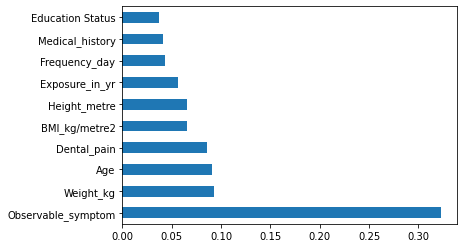

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
X=X.drop(['Socio_Economic Status'],axis=1)
X=X.drop(['Burning_sensation'],axis=1)
X=X.drop(['Sex'],axis=1)
X=X.drop(['Oral_Habits'],axis=1)
X=X.drop(['Dietary_Habits'],axis=1)
X=X.drop(['Spicy/Non_Spicy'],axis=1)

### Standardisation of x label values

In [ ]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
X.shape

(374, 10)

## Model Implementation

### Random Forests

In [ ]:
d_trees = np.arange(1, 200)
train_accuracy = np.empty(len(d_trees))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
for i in (d_trees):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    y_pred = rfc.predict(X_test)
    #metrics.accuracy_score(b_test, y_pred)
    train_accuracy[i-1] = metrics.accuracy_score(y_test, y_pred)

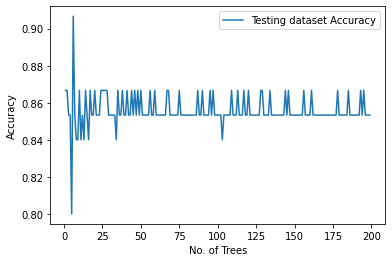

In [ ]:
plt.plot(d_trees,train_accuracy, label = 'Testing dataset Accuracy')

 
plt.legend()
plt.xlabel('No. of Trees')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
clf = RandomForestClassifier(random_state=2)

In [ ]:
score_rf=cross_val_score(clf,X, y,cv=5)
print(score_rf)
print('avg',np.average(score_rf))

[0.64       0.85333333 0.90666667 0.92       0.90540541]
avg 0.8450810810810812


### Bagging

In [ ]:
bg = BaggingClassifier(RandomForestClassifier(),max_samples=0.5, max_features=1.0,random_state=2)

In [ ]:
score_rf_=cross_val_score(bg,X, y,cv=5)
print(score_rf_)
print('avg',np.average(score_rf_))

[0.61333333 0.85333333 0.88       0.92       0.87837838]
avg 0.829009009009009


### Adaboost

In [ ]:
ad = AdaBoostClassifier(RandomForestClassifier(),learning_rate=0.01,random_state=4)

In [ ]:
scorerf_=cross_val_score(ad,X, y,cv=5)
print(scorerf_)
print('avg',np.average(scorerf_))

[0.64       0.82666667 0.89333333 0.93333333 0.91891892]
avg 0.8424504504504506


### Gradient Boosting

In [ ]:
model = GradientBoostingClassifier(random_state=6)

In [ ]:
scoe_rf_=cross_val_score(model,X, y,cv=5)
print(scoe_rf_)
print('avg',np.average(scoe_rf_))

[0.6        0.89333333 0.90666667 0.92       0.89189189]
avg 0.8423783783783783


### SVM

In [ ]:
clf= SVC(kernel='linear',probability=True,random_state=1)

In [ ]:
sore_r_f_=cross_val_score(clf,X, y,cv=5)
print(sore_r_f_)
print('avg',np.average(sore_r_f_))

[0.85333333 0.88       0.89333333 0.90666667 0.90540541]
avg 0.8877477477477479


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [ ]:
modol = KNeighborsClassifier()

In [ ]:
ore_r_f_=cross_val_score(modol,X, y,cv=5)
print(ore_r_f_)
print('avg',np.average(ore_r_f_))

[0.73333333 0.88       0.86666667 0.93333333 0.91891892]
avg 0.8664504504504504


### ANN

In [ ]:
clf_ = MLPClassifier(hidden_layer_sizes=(6,6),
                    max_iter = 60,
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

In [ ]:
ore_r_f_=cross_val_score(clf_,X, y,cv=5)
print(ore_r_f_)
print('avg',np.average(ore_r_f_))

Iteration 1, loss = 0.57969913
Iteration 2, loss = 0.53382795
Iteration 3, loss = 0.48790365
Iteration 4, loss = 0.44496205
Iteration 5, loss = 0.40617075
Iteration 6, loss = 0.37140733
Iteration 7, loss = 0.34322473
Iteration 8, loss = 0.32065202
Iteration 9, loss = 0.30161270
Iteration 10, loss = 0.28512538
Iteration 11, loss = 0.27106540
Iteration 12, loss = 0.25741092
Iteration 13, loss = 0.24456773
Iteration 14, loss = 0.23196364
Iteration 15, loss = 0.22110692
Iteration 16, loss = 0.20969729
Iteration 17, loss = 0.19966211
Iteration 18, loss = 0.18994479
Iteration 19, loss = 0.18112051
Iteration 20, loss = 0.17372365
Iteration 21, loss = 0.16805298
Iteration 22, loss = 0.16348585
Iteration 23, loss = 0.16101565
Iteration 24, loss = 0.15785025
Iteration 25, loss = 0.15482872
Iteration 26, loss = 0.15214465
Iteration 27, loss = 0.14907341
Iteration 28, loss = 0.14632313
Iteration 29, loss = 0.14415173
Iteration 30, loss = 0.14209352
Iteration 31, loss = 0.14010664
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 37, loss = 0.13447413
Iteration 38, loss = 0.13428558
Iteration 39, loss = 0.13371101
Iteration 40, loss = 0.13268917
Iteration 41, loss = 0.13203561
Iteration 42, loss = 0.13142131
Iteration 43, loss = 0.13105481
Iteration 44, loss = 0.12994166
Iteration 45, loss = 0.12963594
Iteration 46, loss = 0.12824693
Iteration 47, loss = 0.12740404
Iteration 48, loss = 0.12561977
Iteration 49, loss = 0.12512788
Iteration 50, loss = 0.12472973
Iteration 51, loss = 0.12452997
Iteration 52, loss = 0.12291545
Iteration 53, loss = 0.12196206
Iteration 54, loss = 0.12132267
Iteration 55, loss = 0.12040975
Iteration 56, loss = 0.11978515
Iteration 57, loss = 0.12085586
Iteration 58, loss = 0.11966293
Iteration 59, loss = 0.11853439
Iteration 60, loss = 0.11815435
Iteration 1, loss = 0.56872509
Iteration 2, loss = 0.52840345
Iteration 3, loss = 0.49133139
Iteration 4, loss = 0.45777660
Iteration 5, loss = 0.42414167
Iteration 6, loss = 0.39349889
Iteration 7, loss = 0.36723849
Iteration 8, lo

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 39, loss = 0.15053116
Iteration 40, loss = 0.14985851
Iteration 41, loss = 0.14834224
Iteration 42, loss = 0.14790057
Iteration 43, loss = 0.14735304
Iteration 44, loss = 0.14699339
Iteration 45, loss = 0.14578289
Iteration 46, loss = 0.14488864
Iteration 47, loss = 0.14483423
Iteration 48, loss = 0.14385201
Iteration 49, loss = 0.14288226
Iteration 50, loss = 0.14275315
Iteration 51, loss = 0.14206317
Iteration 52, loss = 0.14135047
Iteration 53, loss = 0.14068149
Iteration 54, loss = 0.13971028
Iteration 55, loss = 0.13961426
Iteration 56, loss = 0.13949206
Iteration 57, loss = 0.13939612
Iteration 58, loss = 0.13802934
Iteration 59, loss = 0.13763036
Iteration 60, loss = 0.13684236
Iteration 1, loss = 0.56549324
Iteration 2, loss = 0.52782378
Iteration 3, loss = 0.49203757
Iteration 4, loss = 0.45939903
Iteration 5, loss = 0.42700157
Iteration 6, loss = 0.39768908
Iteration 7, loss = 0.37033485
Iteration 8, loss = 0.34720072
Iteration 9, loss = 0.32561341
Iteration 10, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
